<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;"></td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<img style="float: right;" src="https://avatars.githubusercontent.com/u/141567859?s=200&v=4">
    
<br>
<br>
<br>
<font size="8">QuantumQuipu/</font><br>
<br>
<br>
<font size="15"><b>QuantumScholars2023</b></font>
<br>
<br>
<br>
<br>
<br>

<div style="border-top: 20px solid #DE781F;"></div>

**Autor:** Gustavo Valdivia Mera\
**Institución:** University of Houston\
**Correo:** gvaldiviamera@uh.edu
          
Este material está sujeto a los términos y condiciones de la licencia
[Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).\
 Se permite el uso gratuito para cualquier propósito no comercial.

*Puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase en nuestro canal de [Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*    

## Implementación

Veamos el siguiente problema de nodos y aristas

<img src="imagenes/sesion5/ag_im.png" width="50%" align="center">
    </td></tr>
    
Debemos implementar un algoritmo que haga posible identificar dos grupos de nodos, de tal forma que la cantidad de aristas entre los elementos de grupos distintos sea la mayor posible.

Algunos ejemplos de grupos (no deseados):

<img src="imagenes/sesion5/ag_im2.png" width="50%" align="center">
    </td></tr>
    
Notamos que cada grupo tiene un color específico, entonces en nuestro algoritmo esto será indicado por el estado del qubit asociado con el nodo:

- Para los elementos del conjunto naranja, cada qubit estará en el estado $\ket{0}$.
- Para los elementos del conjunto azul, cada qubit estará en el estado $\ket{1}$.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

In [2]:
def oracle_part(qc,qr):
    mcx = XGate().control(3)
    
    #Los qubits del 0 al 3 son los nodos.
    #Los qubits del 4 al 8 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[4])
    qc.cx(qr[1], qr[4])
    qc.barrier()
    qc.cx(qr[0], qr[5])
    qc.cx(qr[2], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[3], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[2], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[3], qr[8])
    qc.barrier()
    
    #Los qubits del 9 al 11 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_10 y q_9.
    qc.barrier()    
    qc.cx(qr[4],qr[9])
    qc.barrier()
    
    qc.ccx(qr[5], qr[9], qr[10])
    qc.cx(qr[5],qr[9])
    qc.barrier()
    
    qc.ccx(qr[6], qr[9], qr[10])
    qc.cx(qr[6],qr[9])
    qc.barrier()
    
    qc.append(mcx,[7,9,10,11])
    qc.ccx(qr[7], qr[9], qr[10])
    qc.cx(qr[7],qr[9])
    qc.barrier()
    
    qc.append(mcx,[8,9,10,11])
    qc.ccx(qr[8], qr[9], qr[10])
    qc.cx(qr[8],qr[9])
    qc.barrier()
    
    qc.x(qr[9])
    qc.x(qr[10])
    qc.barrier()
    
    #El qubit 12 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[9,10,11,12])
    
    return qc

In [3]:
#qr=QuantumRegister(9)
#qc=QuantumCircuit(qr)
#oracle_part(qc,qr).draw()

In [4]:
#qr=QuantumRegister(13)
#qc=QuantumCircuit(qr)
#oracle_part(qc,qr).draw()

In [5]:
def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)
    qc1=qc.inverse()
    qc.z(12)
    qc.compose(qc1,inplace=True)
    
    return qc

In [6]:
#qr=QuantumRegister(13)
#qc=QuantumCircuit(qr)
#oracle(qc,qr).draw()

In [7]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(3)
    
    qc.barrier()
    qc.h(range(4))
    qc.x(range(4))
    qc.append(mcz,list(range(0,4)))
    qc.x(range(4))
    qc.h(range(4))
    qc.barrier()
    return qc

In [8]:
qr=QuantumRegister(13)
qc=QuantumCircuit(qr)
grover_diffusion(qc,qr).draw()

░ ┌───┐┌───┐   ┌───┐┌───┐ ░ 
 q0_0: ─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
        ░ ├───┤├───┤ │ ├───┤├───┤ ░ 
 q0_1: ─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
        ░ ├───┤├───┤ │ ├───┤├───┤ ░ 
 q0_2: ─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
        ░ ├───┤├───┤ │ ├───┤├───┤ ░ 
 q0_3: ─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
        ░ └───┘└───┘   └───┘└───┘ ░ 
 q0_4: ─░─────────────────────────░─
        ░                         ░ 
 q0_5: ─░─────────────────────────░─
        ░                         ░ 
 q0_6: ─░─────────────────────────░─
        ░                         ░ 
 q0_7: ─░─────────────────────────░─
        ░                         ░ 
 q0_8: ─░─────────────────────────░─
        ░                         ░ 
 q0_9: ─░─────────────────────────░─
        ░                         ░ 
q0_10: ─░─────────────────────────░─
        ░                         ░ 
q0_11: ─░─────────────────────────░─
        ░                         ░ 
q0_12: ─░─────────────────────────░─
        ░                         ░

In [9]:
def grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

In [10]:
#qr=QuantumRegister(13)
#qc=QuantumCircuit(qr)
#grover(qc,qr).draw()

In [11]:
qr=QuantumRegister(13)
qc=QuantumCircuit(qr)

qra=QuantumRegister(13)
cra=ClassicalRegister(4)
qa=QuantumCircuit(qra,cra)

qa.h(range(4))
qb=grover(qc,qr)
qa.compose(qb.compose(qb),inplace=True)

qa.measure(range(4),cra)

qa.draw()

┌───┐           ░            ░            ░            ░            ░ »
 q2_0: ┤ H ├──■────────░───■────────░───■────────░────────────░────────────░─»
       ├───┤  │        ░   │        ░   │        ░            ░            ░ »
 q2_1: ┤ H ├──┼────■───░───┼────────░───┼────────░───■────────░───■────────░─»
       ├───┤  │    │   ░   │        ░   │        ░   │        ░   │        ░ »
 q2_2: ┤ H ├──┼────┼───░───┼────■───░───┼────────░───┼────■───░───┼────────░─»
       ├───┤  │    │   ░   │    │   ░   │        ░   │    │   ░   │        ░ »
 q2_3: ┤ H ├──┼────┼───░───┼────┼───░───┼────■───░───┼────┼───░───┼────■───░─»
       └───┘┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │    │   ░ »
 q2_4: ─────┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░─»
            └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░ »
 q2_5: ────────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░─»
                       ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░ »
 q2_6: ────────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░─»
                       ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░ »
 q2_7: ────────────────░────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░─»
                       ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░ »
 q2_8: ────────────────░────────────░────────────░────────────░─┤ X ├┤ X ├─░─»
                       ░            ░            ░            ░ └───┘└───┘ ░ »
 q2_9: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_10: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_11: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
q2_12: ────────────────░────────────░────────────░────────────░────────────░─»
                       ░            ░            ░            ░            ░ »
 c0: 4/══════════════════════════════════════════════════════════════════════»
                                                                             »
«        ░       ░            ░            ░                 ░                »
« q2_0: ─░───────░────────────░────────────░─────────────────░────────────────»
«        ░       ░            ░            ░                 ░                »
« q2_1: ─░───────░────────────░────────────░─────────────────░────────────────»
«        ░       ░            ░            ░                 ░                »
« q2_2: ─░───────░────────────░────────────░─────────────────░────────────────»
«        ░       ░            ░            ░                 ░                »
« q2_3: ─░───────░────────────░────────────░─────────────────░────────────────»
«        ░       ░            ░            ░                 ░                »
« q2_4: ─░───■───░────────────░────────────░─────────────────░────────────────»
«        ░   │   ░            ░            ░                 ░                »
« q2_5: ─░───┼───░───■────■───░────────────░─────────────────░────────────────»
«        ░   │   ░   │    │   ░            ░                 ░                »
« q2_6: ─░───┼───░───┼────┼───░───■────■───░─────────────────░────────────────»
«        ░   │   ░   │    │   ░   │    │   ░                 ░                »
« q2_7: ─░───┼───░───┼────┼───░───┼────┼───░───■────■────■───░────────────────»
«        ░   │   ░   │    │   ░   │    │   ░   │    │    │   ░                »
« q2_8: ─░───┼───░───┼────┼───░───┼────┼───░───┼────┼────┼───░───■────■────■──»
«        ░ ┌─┴─┐ ░   │  ┌─┴─┐ ░   │  ┌─┴─┐ ░   │    │  ┌─┴─┐ ░   │    │  ┌─┴─┐»
« q2_9: ─░─┤ X ├─░───■──┤ X ├─░───■──┤ X ├─░───■────■──┤ X ├─░───■────■──┤ X ├»
«        ░ └───┘ ░ ┌─┴─┐└───┘ ░ ┌─┴─┐└───┘ ░   │  ┌─┴─┐└───┘ ░   │  ┌─┴─┐└───┘»
«q2_10: ─░───────░─┤ X ├──────░─┤ X 

In [12]:
#circuit.draw('latex_source', filename='./file.tex')
#!pdflatex file.tex

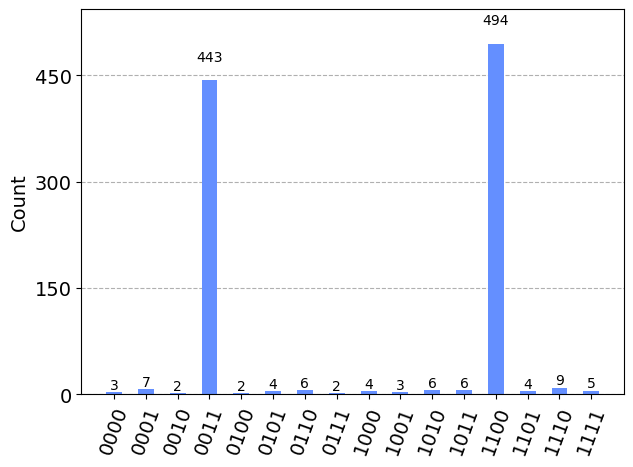

In [13]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

---

## 5. Recursos útiles

[1] Grover L.K.: [A fast quantum mechanical algorithm for database search](https://arxiv.org/abs/quant-ph/9605043),

Proceedings, 28th Annual ACM Symposium on the Theory of Computing, (May 1996).

[2] [Qiksit: Grover’s Algorithm
](https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm)

---

## Donaciones
<br>
Puedes donar una vez en el siguiente enlace (Ko-Fi)

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>